# D209 - Data Mining I - Performance Assessment Task 2
## Joshua T. Funderburk

## Part I: Research Question

### A1. Research Question

The question posed for this analysis is “Can key demographic and medical factors predict whether a patient will be readmitted to the hospital using Random Forest?” Hospital readmittance has a costly impact on hospitals, medical staff, insurance companies, and patients. Hospital and medical staff availability is generally spread thin with the amount of patients admitted. Insurance companies and patients often suffer substantial financial burden from repeat stays. Most importantly, patients who are readmitted often do not have as great of a patient outcome. Readmittance can also indicate gaps in the quality of care or post-discharge support. By uncovering predictive factors to hospital readmittance, analysis and recommendations can be provided to medical staff to educate care givers and get ahead of issues relating to readmittance.

### A2. Defined Goal

The goal of this analysis is to determine what factors are associated with patient hospital readmission. Using Random Forest Classification in Python, patient demographic and health condition data will be used to predict readmission risk. By examining which features contribute most to accurate predictions, we can identify the most influential factors affecting readmission. These insights will be used to develop recommendations for medical staff to support their decision-making process for patient care and discharge planning.

## Part II: Method Justification

### B1. Explanation of Prediction

#### Explanation
Random Forest (RF) will analyze the hospital readmission dataset by examining multiple patient features simultaneously through its ensemble of decision trees. Specifically, it will process the key demographic and medical factors selected for this analysis to identify patterns associated with readmission risk. RF will the dataset's complexity through bootstrap sampling by creating multiple training data subsets that capture different combinations of patient characteristics (What is Random Forest?). Each decision tree will learn from a different subset, allowing the model to recognize diverse readmission risk patterns. The algorithm also enables evaluation of feature importance to identify which patient characteristics most strongly predict readmission (Feature importance in random forest: In-depth guide 2024).

#### Expected Outcome
Random Forest generates binary predictions (readmission vs. no readmission) for each patient. RF does well with class imbalance, but it should be a consideration for any machine learning model. Data on feature importance will show which patient characteristics most strongly predict readmission. Performance metrics such as accuracy, sensitivity, and specificity evaluate the model's effectiveness in classifying data points. Overall, the expected outcome is a RF model that is able to predict whether a patient will be readmitted to the hospital.

### B2. Summary of Method Assumption

Random Forest assumes that the predictions from each tree have very low correlations (M, 2024). In fact, low correlation and tree independence is necessary for RF to be effective. This assumption ultimately matters because if individual trees make similar predictions, you lose the main benefit of ensemble learning, which is diverse perspectives combining to create a more robust model. Tree independence is achieved through feature randomaization, bootstrap sampling, and different split points in the decision trees. It is important to note that while low correlation between trees is important, each individual tree needs to be reasonably accurate.

### B3. Packages or Libraries List
- **matplotlib.pyplot** (plt) - Data visualization and plotting
- **numpy** (np) - Numerical computing and array operations
- **pandas** (pd) - Data manipulation and analysis
- **seaborn** (sns) - Statistical data visualization
- **sklearn.ensemble**:
    - **AdaBoostClassifier** - Boosting ensemble classifier
    - **RandomForestClassifier** - Random forest ensemble classifier
- **sklearn.feature_selection**:
    - **SelectKBest** - Selects top k features
    - **f_classif** - Feature scoring for classification
- **sklearn.model_selection**:
    - **GridSearchCV** - Hyperparameter tuning
    - **train_test_split** - Splits data into training/testing sets
- **sklearn.metrics**:
    - **accuracy_score** - Calculates prediction accuracy
    - **classification_report** - Performance metrics for classifiers
    - **confusion_matrix** - Shows prediction errors
    - **mean_squared_error** - Calculates average squared difference between predictions and actual values
    - **roc_auc_score** - Computes Area Under the Receiver Operating Characteristic Curve
    - **roc_curve** - Computes Receiver Operating Characteristic curve
- **statsmodels.stats.outliers_influence**:
    - **variance_inflation_factor** - Detects multicollinearity between features

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, roc_auc_score, roc_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor

## Part III: Data Preparation

#### Read CSV & Load Data in to Pandas Dataframe

In [2]:
df = pd.read_csv(r'C:\Users\funde\Desktop\WGU\D209\medical_clean.csv',index_col=0)

In [3]:
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
# Identify columns that do not contain values for all 10000 rows in the data set
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [5]:
# Analyze data types
dt = df.dtypes
print(dt)

Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain               object
Anxiety   

### C1. Data Preprocessing
Many machine learning models cannot work effectively with numerical data. Therefore, categorical values in the dataset are converted to numeric form. This is accomplished using one-hot encoding, a data preparation technique that transforms categorical variables into multiple boolean variables. The boolean values ("Yes" and "No") are represented numerically as 1 and 0. The Pandas get_dummies() function will perform this encoding. Python for loops will automatically assign column names and add columns to the dataframe.

### C2. Data Set Variables
The following are the variables selected for this analysis and their corresponding data types (categorical versus numeric):
- Age: Numeric
- Allergic Rhinitis: Categorical
- Anxiety: Categorical
- Arthritis: Categorical
- Asthma: Categorical
- Back Pain: Categorical
- Complication Risk (Low or Medium or High): Categorical
- Diabetes: Categorical
- Gender (Male or Female or Non-binary): Categorical
- High Blood Pressure: Categorical
- Hyperlipidemia: Categorical
- Initial Admission Reason (Elective or Emergency or Observation): Categorical
- Initial Days: Numeric
- Overweight: Categorical
- Readmission: Categorical
- Reflux Esophagitis: Categorical
- Soft Drink: Categorical
- Stroke: Categorical
- Vitamin D Supplement: Numeric

### C3. Steps for Analysis

The following are the steps I will follow to perform this analysis:
1. Prepare the data
    - Ensure there are non-null values in all relevant columns
    - Analyze and update data types where necessary
    - Update confusing or misleading column names
    - Convert zip code to object data type and fill to five numbers*
        - Zip Code is truly categorical in nature, not meant to be represented numerically
    - Convert Area, TimeZone, Marital, Gender, Initial_admin, Complication_risk, Services to category data type*
        - Allows for correct handling of data for the nature of the data
    - Map specific timezones to broader categories*
        - Historically, bucketing the timezones in to broader categories has gleaned more insights and has been easier to work with
    - Update values of Boolean columns to be 1 for Yes and 0 for No
        - This is required for several statistical models to be able to work with this data type
    - Rename survey columns to better match the data definition*
        - The "Item" prefix does not make it clear what the data represents. Updating column names for ease of use.
2. Perform summary statistics to explore the data
    - ReAdmis variable as the dependent variable
    - Age, Allergic_rhinitis, Anxiety, Arthritis, Asthma, BackPain, Complication_risk, Diabetes, Gender, HighBlood, Hyperlipidemia, Initial_admin, Initial_days, Overweight, Reflux_esophagitis, Soft_drink, Stroke, and vitD_supp as predictor variables
3. Reexpress categorical data as numeric data (one-hot encoding)
    - Create dummy variables for Complication_risk, Gender, and Initial_admin
    - Add dummy variables to the dataframe
4. Visualize the data
    - Create univariate and bivariate visualizations
5. Perform feature selection to reduce the amount of predictor variables in the model to only those that are statistically significant
    - Feature selection is crucial to prevent overfitting
    - Having a model with fewer, more meaningful features will make it easier to understand and trust the predictions
    - Removing irrelevant features improves performance, saving training time and memory usage

Notes:

" * " indicates that the data preparation step is not necessarily relevant to this particular analysis. Instead of reengineering the data preparation and cleaning for each performance assessment task, I am reusing the code to create a dataset that is consistent from task to task. This is beneficial because if I run in to issues, I can be certain to troubleshoot the new content and that my prepared data steps are solid.

#### Prepare the data

In [6]:
# Zip code to object instead of int as it is truly a categorical dimension. Fill to five numbers.
df['Zip'] = df['Zip'].astype("str").str.zfill(5)
print("Zip data type:", df['Zip'].dtype)

Zip data type: object


In [7]:
# List of columns to convert to 'category' data type
columns_convert_to_category = [
    "Area", "TimeZone", "Marital", "Gender",
    "Initial_admin", "Complication_risk", "Services"
]

# Convert specified columns to 'category' data type
df[columns_convert_to_category] = df[columns_convert_to_category].astype("category")

# Print the data types of the specified columns
print(df[columns_convert_to_category].dtypes)

Area                 category
TimeZone             category
Marital              category
Gender               category
Initial_admin        category
Complication_risk    category
Services             category
dtype: object


In [8]:
# Map specific timezones to broader categories
# Create the timezone mapping dictionary
timezone_mapping = {
    # Alaska Time (AKT)
    'America/Anchorage': 'Alaska Time (AKT)',
    'America/Nome': 'Alaska Time (AKT)',
    'America/Sitka': 'Alaska Time (AKT)',
    'America/Yakutat': 'Alaska Time (AKT)',
    # Atlantic Time (AT)
    'America/Puerto_Rico': 'Atlantic Time (AT)',
    # Central Time (CT)
    'America/Chicago': 'Central Time (CT)',
    'America/Menominee': 'Central Time (CT)',
    'America/North_Dakota/Beulah': 'Central Time (CT)',
    'America/North_Dakota/New_Salem': 'Central Time (CT)',
    # Eastern Time (ET)
    'America/Detroit': 'Eastern Time (ET)',
    'America/Indiana/Indianapolis': 'Eastern Time (ET)',
    'America/Indiana/Knox': 'Eastern Time (ET)',
    'America/Indiana/Marengo': 'Eastern Time (ET)',
    'America/Indiana/Tell_City': 'Eastern Time (ET)',
    'America/Indiana/Vevay': 'Eastern Time (ET)',
    'America/Indiana/Vincennes': 'Eastern Time (ET)',
    'America/Indiana/Winamac': 'Eastern Time (ET)',
    'America/Kentucky/Louisville': 'Eastern Time (ET)',
    'America/New_York': 'Eastern Time (ET)',
    'America/Toronto': 'Eastern Time (ET)',
    # Hawaii-Aleutian Time (HAT)
    'America/Adak': 'Hawaii-Aleutian Time (HAT)',
    'Pacific/Honolulu': 'Hawaii-Aleutian Time (HAT) - No DST',
    # Mountain Time (MT) with DST
    'America/Boise': 'Mountain Time (MT)',
    'America/Denver': 'Mountain Time (MT)',
    # Mountain Time (MST) without DST
    'America/Phoenix': 'Mountain Standard Time (MST) - No DST',
    # Pacific Time (PT)
    'America/Los_Angeles': 'Pacific Time (PT)',
}

# Create new categories (unique values that will be in the mapped data)
new_categories = sorted(set(timezone_mapping.values()))

# Create new categorical type
new_dtype = pd.CategoricalDtype(categories=new_categories, ordered=False)

# Map the values and convert to the new categorical type
df['TimeZone'] = df['TimeZone'].map(timezone_mapping).astype(new_dtype)

# Print the results
print("\nNew timezone categories:")
print(df['TimeZone'].cat.categories.tolist())
print("\nValue counts:")
print(df.TimeZone.value_counts())


New timezone categories:
['Alaska Time (AKT)', 'Atlantic Time (AT)', 'Central Time (CT)', 'Eastern Time (ET)', 'Hawaii-Aleutian Time (HAT)', 'Hawaii-Aleutian Time (HAT) - No DST', 'Mountain Standard Time (MST) - No DST', 'Mountain Time (MT)', 'Pacific Time (PT)']

Value counts:
TimeZone
Eastern Time (ET)                        4330
Central Time (CT)                        3788
Pacific Time (PT)                         937
Mountain Time (MT)                        698
Mountain Standard Time (MST) - No DST     100
Alaska Time (AKT)                          69
Atlantic Time (AT)                         43
Hawaii-Aleutian Time (HAT) - No DST        34
Hawaii-Aleutian Time (HAT)                  1
Name: count, dtype: int64


In [9]:
# Update values of Boolean columns to be 1 for Yes and 0 for No

# List of boolean columns
yes_no_columns = [
    "Soft_drink", "HighBlood", "Stroke", "Overweight", "Arthritis",
    "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis",
    "Reflux_esophagitis", "Asthma", "ReAdmis"
]

# Create mapping dictionary
mapping = {'Yes': 1, 'No': 0}

# Apply mapping and convert to int
for col in yes_no_columns:
    df[col] = df[col].map(mapping).astype(int)

# Verify the conversion
print("\nData Types:")
print(df[yes_no_columns].dtypes)
print("\nFirst Few Rows:")
print(df[yes_no_columns].head())


Data Types:
Soft_drink            int32
HighBlood             int32
Stroke                int32
Overweight            int32
Arthritis             int32
Diabetes              int32
Hyperlipidemia        int32
BackPain              int32
Anxiety               int32
Allergic_rhinitis     int32
Reflux_esophagitis    int32
Asthma                int32
ReAdmis               int32
dtype: object

First Few Rows:
           Soft_drink  HighBlood  Stroke  Overweight  Arthritis  Diabetes  \
CaseOrder                                                                   
1                   0          1       0           0          1         1   
2                   0          1       0           1          0         0   
3                   0          1       0           1          0         1   
4                   0          0       1           0          1         0   
5                   1          0       0           0          0         0   

           Hyperlipidemia  BackPain  Anxiety  Allerg

In [10]:
# Rename survey columns to better match the data definition
df.rename(columns={'Item1':'Survey_Timely_Admission',
                     'Item2':'Survey_Timely_Treatment',
                     'Item3':'Survey_Timely_Visit',
                     'Item4':'Survey_Reliability',
                     'Item5':'Survey_Options',
                     'Item6':'Survey_Hours_of_Treatment',
                     'Item7':'Survey_Courteous_Staff',
                     'Item8':'Survey_Doctor_Active_Listening',
                    },
            inplace=True
            )

# Confirm column names have been updated
print(df.columns[-8:])

Index(['Survey_Timely_Admission', 'Survey_Timely_Treatment',
       'Survey_Timely_Visit', 'Survey_Reliability', 'Survey_Options',
       'Survey_Hours_of_Treatment', 'Survey_Courteous_Staff',
       'Survey_Doctor_Active_Listening'],
      dtype='object')


#### Summary Statistics

#### ReAdmis
36.7% of patients in this dataset were readmitted to the hospital.

In [11]:
# Describe ReAdmis (Dependent Variable)
df.ReAdmis.value_counts()

ReAdmis
0    6331
1    3669
Name: count, dtype: int64

#### Age
It is interesting to note with the age variable that the minimum patient age in the dataset is 18 years old. The sample dataset essentially constrains us to building a model that can draw correlations with length of hospital stay for adult patients. 

In [12]:
# Age - Independent Variable
print("Age Summary Statistics:")
df.Age.describe()

Age Summary Statistics:


count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

#### Allergic Rhinitis
Roughly 39% of the patients suffer from allergic rhinitis.

In [13]:
# Allergic_rhinitis - Independent Variable
print("Allergic Rhinitis Summary Statistics:")
df.Allergic_rhinitis.value_counts()

Allergic Rhinitis Summary Statistics:


Allergic_rhinitis
0    6059
1    3941
Name: count, dtype: int64

#### Anxiety
Roughly 32% of the patients suffer from anxiety.

In [14]:
# Anxiety - Independent Variable
print("Anxiety Summary Statistics:")
df.Anxiety.value_counts()

Anxiety Summary Statistics:


Anxiety
0    6785
1    3215
Name: count, dtype: int64

#### Arthritis
Roughly 36% of the patients suffer from arthritis.

In [15]:
# Arthritis - Independent Variable
print("Arthritis Summary Statistics:")
df.Arthritis.value_counts()

Arthritis Summary Statistics:


Arthritis
0    6426
1    3574
Name: count, dtype: int64

#### Asthma
Only 28.9% of the patients suffer from asthma.

In [16]:
# Asthma - Independent Variable
print("Asthma Summary Statistics:")
df.Asthma.value_counts()

Asthma Summary Statistics:


Asthma
0    7107
1    2893
Name: count, dtype: int64

#### Back Pain
41.1% of the patients suffer from back pain.

In [17]:
# Back Pain - Independent Variable
print("Back Pain Summary Statistics:")
df.BackPain.value_counts()

Back Pain Summary Statistics:


BackPain
0    5886
1    4114
Name: count, dtype: int64

#### Complication Risk
The counts of complication risk are fairly distributed between low, medium, and high. Over 80% of patients have a complication risk of medium or high, which may be common sense being that these individuals are hospitalized.

In [18]:
# Complication_risk - Independent Variable
print("Complication Risk Summary Statistics:")
df.Complication_risk.value_counts()

Complication Risk Summary Statistics:


Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

#### Diabetes
Most patients do not have diabetes - only 27% do.

In [19]:
# Diabetes - Independent Variable
print("Diabetes Summary Statistics:")
df.Diabetes.value_counts()

Diabetes Summary Statistics:


Diabetes
0    7262
1    2738
Name: count, dtype: int64

#### Gender
The split between Male and Female is close, with only 214 identifying as Nonbinary.

In [20]:
# Gender - Independent Variable
print("Gender Summary Statistics:")
df.Gender.value_counts()

Gender Summary Statistics:


Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

#### High Blood
40% of patients have high blood pressure.

In [21]:
# HighBlood - Independent Variable
print("High Blood Pressure Summary Statistics:")
df.HighBlood.value_counts()

High Blood Pressure Summary Statistics:


HighBlood
0    5910
1    4090
Name: count, dtype: int64

#### Hyperlipidemia
33.7% of patients have Hyperlipidemia.

In [22]:
# Hyperlipidemia - Independent Variable
print("Hyperlipidemia Summary Statistics:")
df.Hyperlipidemia.value_counts()

Hyperlipidemia Summary Statistics:


Hyperlipidemia
0    6628
1    3372
Name: count, dtype: int64

#### Initial Admin
Emergency admissions account for slightly over 50% of all admissions with elective and observation admissions accounting for 25% each.

In [23]:
# Initial_admin - Independent Variable
print("Initial Admin Summary Statistics:")
df.Initial_admin.value_counts()

Initial Admin Summary Statistics:


Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

#### Initial days
The sample in this dataset shows a fairly broad range of days spent in the hospital on the initial stay, with a minimum of 1 day and a maximum of almost 72 days. The mean shows initial stay length of 35.5 days - over a month long. 

In [24]:
# Describe Initial_days (Dependent Variable)
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

To check for outliers, the intial day values are grouped in to bins of 5. Although most values seem to be on either the extreme of low stay length or high stay length, there do not seem to be any outliers that would skew the results of analysis or modeling.

Source: [Python - Creating Bins (bucketing)](https://www.youtube.com/watch?app=desktop&v=I83PNH0JRMA) 

In [25]:
# Check Initial_days for outliers by binning the results by 5 days and analyzing

# Define the bin range
max_value = df['Initial_days'].max()
bins = np.arange(0, max_value + 5, 5)

# Create bucket labels
labels = [f'{i}-{i+4}' for i in bins[:-1]]

# Use pd.cut to categorize the data and value_counts to get the count of each bucket
bucket_counts = pd.cut(df['Initial_days'], bins=bins, labels=labels, right=False).value_counts()

# Sort the output by the bucket labels
sorted_bucket_counts = bucket_counts.sort_index()

print(sorted_bucket_counts)

Initial_days
0.0-4.0      1486
5.0-9.0      1605
10.0-14.0    1015
15.0-19.0     571
20.0-24.0     234
25.0-29.0      68
30.0-34.0      19
35.0-39.0     116
40.0-44.0     249
45.0-49.0     401
50.0-54.0     668
55.0-59.0     870
60.0-64.0    1030
65.0-69.0    1195
70.0-74.0     473
Name: count, dtype: int64


#### Overweight
70% of patients in the dataset are considered overweight. This may be an indicator of a person's likelihood to be hospitalized, but it is yet to be seen whether being overweight also can inform the length of stay.

In [26]:
# Overweight - Independent Variable
print("Overweight Summary Statistics:")
df.Overweight.value_counts()

Overweight Summary Statistics:


Overweight
1    7094
0    2906
Name: count, dtype: int64

#### Reflux Esophagitis
41.4% of patients suffer from reflux esophagitis.

In [27]:
# Reflux_esophagitis - Independent Variable
print("Reflux Esophagitis Summary Statistics:")
df.Reflux_esophagitis.value_counts()

Reflux Esophagitis Summary Statistics:


Reflux_esophagitis
0    5865
1    4135
Name: count, dtype: int64

#### Soft Drink
Only 25% of the patients state they drink soft drinks.

In [28]:
# Soft_drink - Independent Variable
print("Soft Drink Summary Statistics:")
df.Soft_drink.value_counts()

Soft Drink Summary Statistics:


Soft_drink
0    7425
1    2575
Name: count, dtype: int64

#### Stroke
Only 1 in 5 patients are identified as having had a stroke.

In [29]:
# Stroke - Independent Variable
print("Stroke Summary Statistics:")
df.Stroke.value_counts()

Stroke Summary Statistics:


Stroke
0    8007
1    1993
Name: count, dtype: int64

#### Vitamin D Supp
The overwhelming majority of patients have 0 or 1 vitamin d supplements.

In [30]:
# vitD_supp - Independent Variable
print("Vitamin D Supplement Summary Statistics:")
df.vitD_supp.value_counts()

Vitamin D Supplement Summary Statistics:


vitD_supp
0    6702
1    2684
2     544
3      64
4       5
5       1
Name: count, dtype: int64

#### One-Hot Encoding

Source from [Python Pandas – get_dummies() method](https://www.geeksforgeeks.org/python-pandas-get_dummies-method/)

In [31]:
## Create dummy variables
complication_risk_dummy = pd.get_dummies(data=df["Complication_risk"])
gender_dummy = pd.get_dummies(data=df["Gender"])
initial_admin_dummy = pd.get_dummies(data=df["Initial_admin"])

# Convert the list of columns to a DataFrame
base_columns = ["Age", "Allergic_rhinitis",  "Anxiety", "Arthritis", "Asthma",
                "BackPain", "Diabetes", "HighBlood", "Hyperlipidemia", 
                "Initial_days", "Overweight", "ReAdmis", "Reflux_esophagitis", 
                "Soft_drink", "Stroke", "vitD_supp"]

# Create the DataFrame
rdf = df[base_columns].copy()

# Add dummy variables
for col in complication_risk_dummy.columns:
    rdf[f'Complication_risk_{col}'] = complication_risk_dummy[col]
for col in gender_dummy.columns:
    rdf[f'Gender_{col}'] = gender_dummy[col]
for col in initial_admin_dummy.columns:
    rdf[f'Initial_Admin_{col}'] = initial_admin_dummy[col]

# Convert boolean columns to integers (after adding all dummy variables)
bool_columns = rdf.select_dtypes(include='bool').columns
rdf[bool_columns] = rdf[bool_columns].astype(int)

print("\nFinal DataFrame shape:", rdf.shape)
print("\nColumns in final DataFrame:")
print(rdf.columns.tolist())


Final DataFrame shape: (10000, 25)

Columns in final DataFrame:
['Age', 'Allergic_rhinitis', 'Anxiety', 'Arthritis', 'Asthma', 'BackPain', 'Diabetes', 'HighBlood', 'Hyperlipidemia', 'Initial_days', 'Overweight', 'ReAdmis', 'Reflux_esophagitis', 'Soft_drink', 'Stroke', 'vitD_supp', 'Complication_risk_High', 'Complication_risk_Low', 'Complication_risk_Medium', 'Gender_Female', 'Gender_Male', 'Gender_Nonbinary', 'Initial_Admin_Elective Admission', 'Initial_Admin_Emergency Admission', 'Initial_Admin_Observation Admission']


#### Visualize the Data

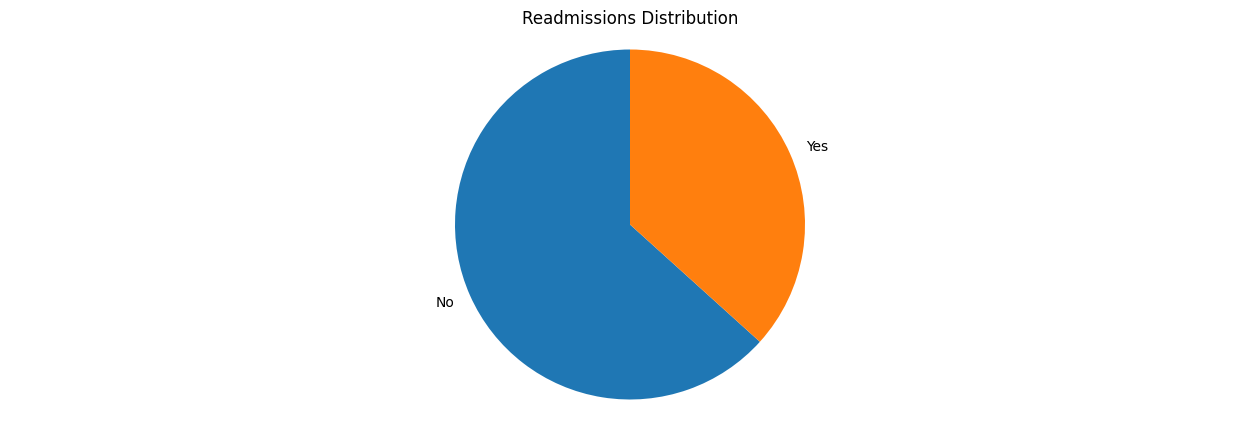

In [32]:
# Create a copy of the dataframe with mapped values for better labels
df_plot = df.copy()
df_plot['ReAdmis'] = df_plot['ReAdmis'].map({0: 'No', 1: 'Yes'})

# Calculate value counts from the Readmis column
value_counts = df_plot['ReAdmis'].value_counts()

# Create pie chart
plt.figure(figsize=(16, 5))
plt.pie(value_counts.values, 
        labels=value_counts.index,
        startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Readmissions Distribution')

plt.show()

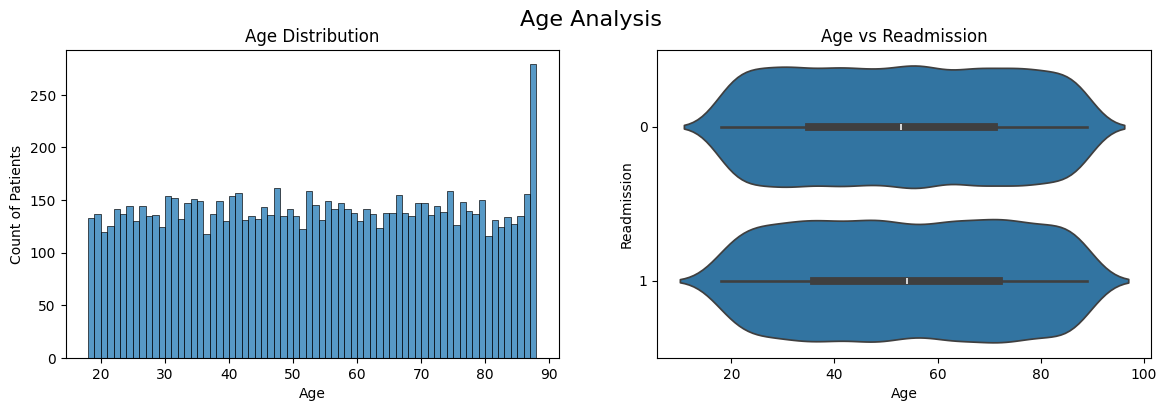

In [33]:
# Age

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

## Univariate Analysis ##
min_age = df.Age.min()
max_age = df.Age.max()
bins = np.arange(min_age, max_age, 1)
sns.histplot(df['Age'], bins=bins, ax=axs[0])

# Chart features for Age distribution
axs[0].set_title('Age Distribution')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count of Patients')

## Bivariate Analysis ##
sns.violinplot(data = rdf, x="Age", y="ReAdmis", orient='h')

# Chart features for Age vs Readmission
axs[1].set_title('Age vs Readmission')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Readmission')

# Add a suptitle over both subplots
fig.suptitle('Age Analysis', fontsize=16)

# Adjust layout with more padding
plt.subplots_adjust(wspace=0.2) 

# Show the plots
plt.show()

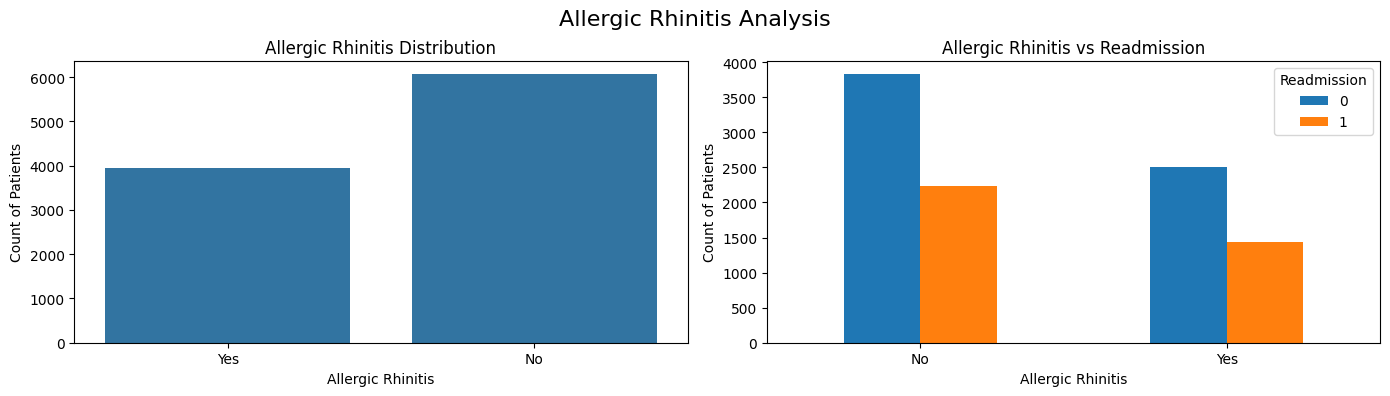

In [34]:
# Allergic Rhinitis

# Create a copy of the dataframe with mapped values for better labels
df_plot = df.copy()
df_plot['Allergic_rhinitis'] = df_plot['Allergic_rhinitis'].map({0: 'No', 1: 'Yes'})

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Plot 1: Distribution of Allergic Rhinitis
sns.countplot(x='Allergic_rhinitis', data=df_plot, ax=axs[0])
axs[0].set_title('Allergic Rhinitis Distribution')
axs[0].set_xlabel('Allergic Rhinitis')
axs[0].set_ylabel('Count of Patients')

# Plot 2: Allergic Rhinitis vs Readmission using crosstab
cross_tab = pd.crosstab(df_plot['Allergic_rhinitis'], df_plot['ReAdmis'])
cross_tab.plot(kind='bar', ax=axs[1])
axs[1].set_title('Allergic Rhinitis vs Readmission')
axs[1].set_xlabel('Allergic Rhinitis')
axs[1].set_ylabel('Count of Patients')
axs[1].legend(title='Readmission')
axs[1].tick_params(axis='x', rotation=0)

# Add a suptitle over both subplots
fig.suptitle('Allergic Rhinitis Analysis', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()

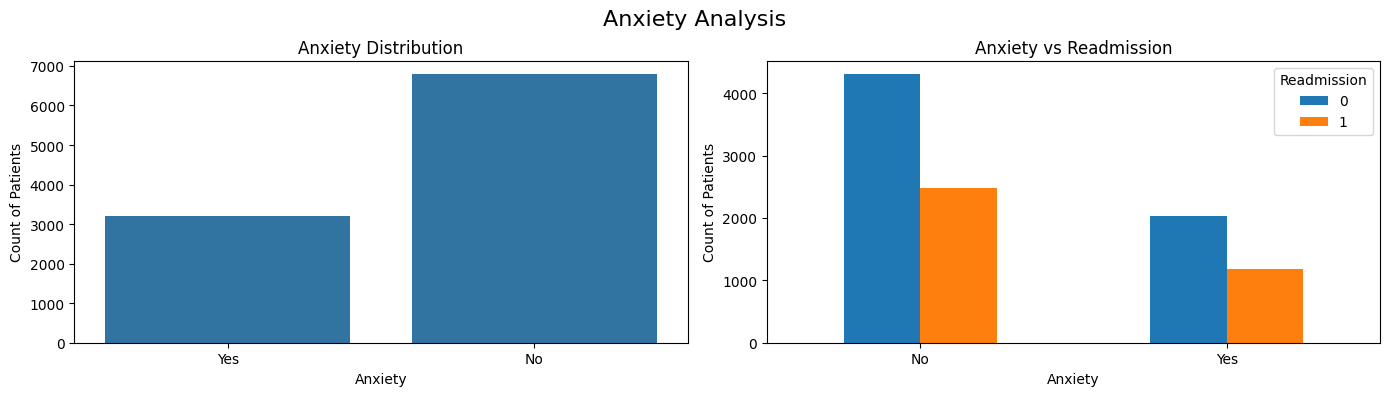

In [35]:
# Anxiety

# Create a copy of the dataframe with mapped values for better labels
df_plot = df.copy()
df_plot['Anxiety'] = df_plot['Anxiety'].map({0: 'No', 1: 'Yes'})

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Plot 1: Distribution of Anxiety
sns.countplot(x='Anxiety', data=df_plot, ax=axs[0])
axs[0].set_title('Anxiety Distribution')
axs[0].set_xlabel('Anxiety')
axs[0].set_ylabel('Count of Patients')

# Plot 2: Anxiety vs Readmission using crosstab
cross_tab = pd.crosstab(df_plot['Anxiety'], df_plot['ReAdmis'])
cross_tab.plot(kind='bar', ax=axs[1])
axs[1].set_title('Anxiety vs Readmission')
axs[1].set_xlabel('Anxiety')
axs[1].set_ylabel('Count of Patients')
axs[1].legend(title='Readmission')
axs[1].tick_params(axis='x', rotation=0)

# Add a suptitle over both subplots
fig.suptitle('Anxiety Analysis', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()

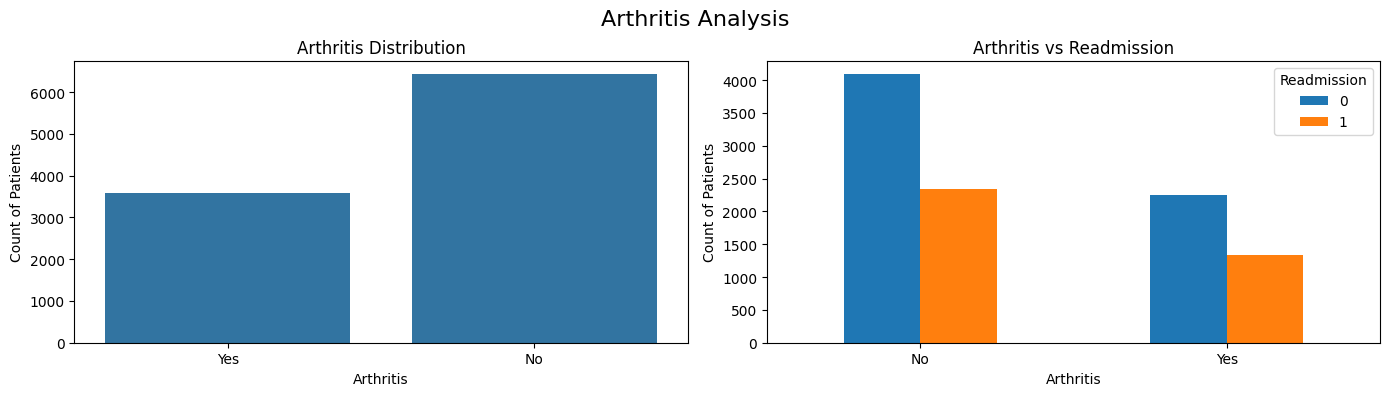

In [36]:
# Arthritis

# Create a copy of the dataframe with mapped values for better labels
df_plot = df.copy()
df_plot['Arthritis'] = df_plot['Arthritis'].map({0: 'No', 1: 'Yes'})

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Plot 1: Distribution of Arthritis
sns.countplot(x='Arthritis', data=df_plot, ax=axs[0])
axs[0].set_title('Arthritis Distribution')
axs[0].set_xlabel('Arthritis')
axs[0].set_ylabel('Count of Patients')

# Plot 2: Arthritis vs Readmission using crosstab
cross_tab = pd.crosstab(df_plot['Arthritis'], df_plot['ReAdmis'])
cross_tab.plot(kind='bar', ax=axs[1])
axs[1].set_title('Arthritis vs Readmission')
axs[1].set_xlabel('Arthritis')
axs[1].set_ylabel('Count of Patients')
axs[1].legend(title='Readmission')
axs[1].tick_params(axis='x', rotation=0)

# Add a suptitle over both subplots
fig.suptitle('Arthritis Analysis', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()

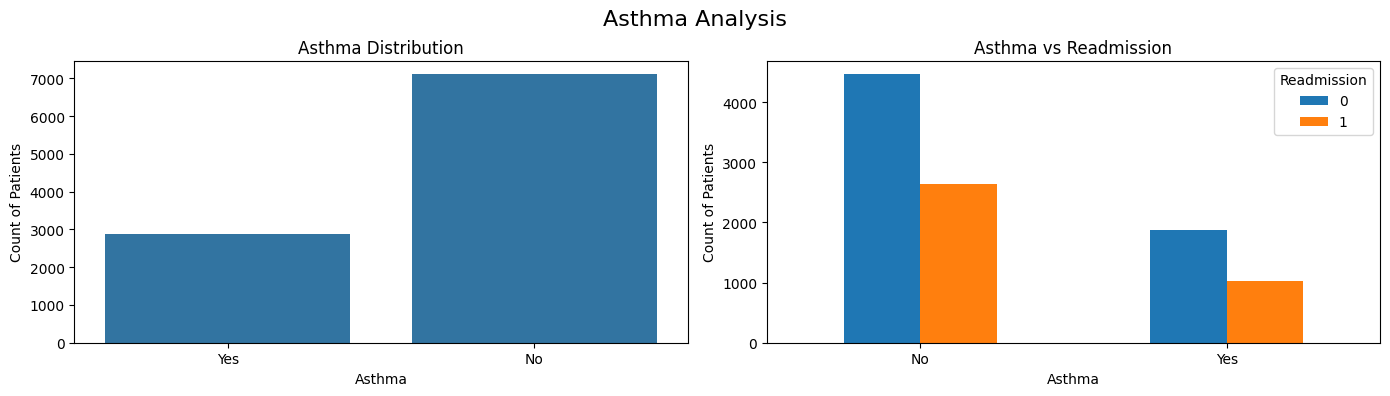

In [37]:
# Asthma

# Create a copy of the dataframe with mapped values for better labels
df_plot = df.copy()
df_plot['Asthma'] = df_plot['Asthma'].map({0: 'No', 1: 'Yes'})

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Plot 1: Distribution of Asthma
sns.countplot(x='Asthma', data=df_plot, ax=axs[0])
axs[0].set_title('Asthma Distribution')
axs[0].set_xlabel('Asthma')
axs[0].set_ylabel('Count of Patients')

# Plot 2: Asthma vs Readmission using crosstab
cross_tab = pd.crosstab(df_plot['Asthma'], df_plot['ReAdmis'])
cross_tab.plot(kind='bar', ax=axs[1])
axs[1].set_title('Asthma vs Readmission')
axs[1].set_xlabel('Asthma')
axs[1].set_ylabel('Count of Patients')
axs[1].legend(title='Readmission')
axs[1].tick_params(axis='x', rotation=0)

# Add a suptitle over both subplots
fig.suptitle('Asthma Analysis', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()


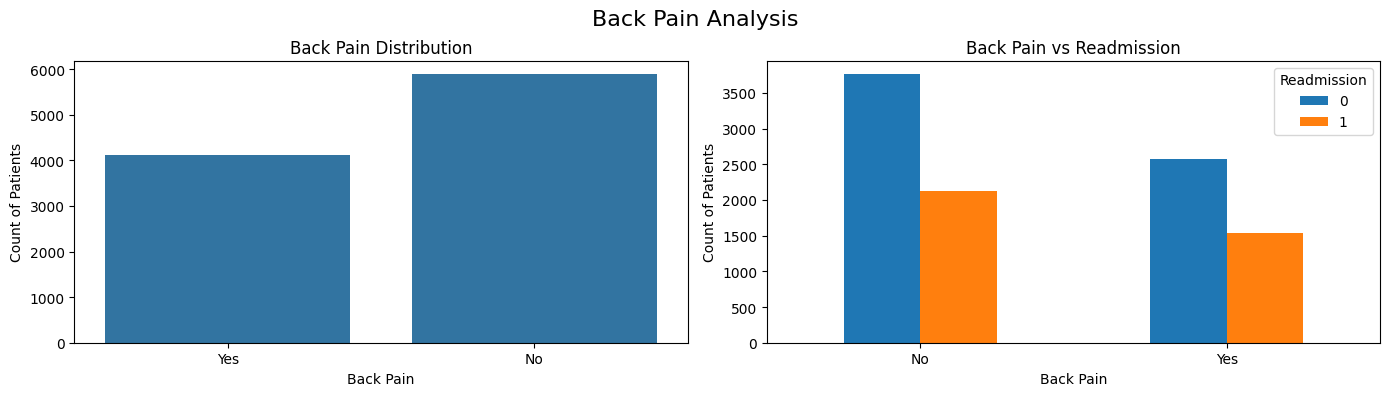

In [38]:
# Back Pain

# Create a copy of the dataframe with mapped values for better labels
df_plot = df.copy()
df_plot['BackPain'] = df_plot['BackPain'].map({0: 'No', 1: 'Yes'})

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Plot 1: Distribution of Back Pain
sns.countplot(x='BackPain', data=df_plot, ax=axs[0])
axs[0].set_title('Back Pain Distribution')
axs[0].set_xlabel('Back Pain')
axs[0].set_ylabel('Count of Patients')

# Plot 2: Back Pain vs Readmission using crosstab
cross_tab = pd.crosstab(df_plot['BackPain'], df_plot['ReAdmis'])
cross_tab.plot(kind='bar', ax=axs[1])
axs[1].set_title('Back Pain vs Readmission')
axs[1].set_xlabel('Back Pain')
axs[1].set_ylabel('Count of Patients')
axs[1].legend(title='Readmission')
axs[1].tick_params(axis='x', rotation=0)

# Add a suptitle over both subplots
fig.suptitle('Back Pain Analysis', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()


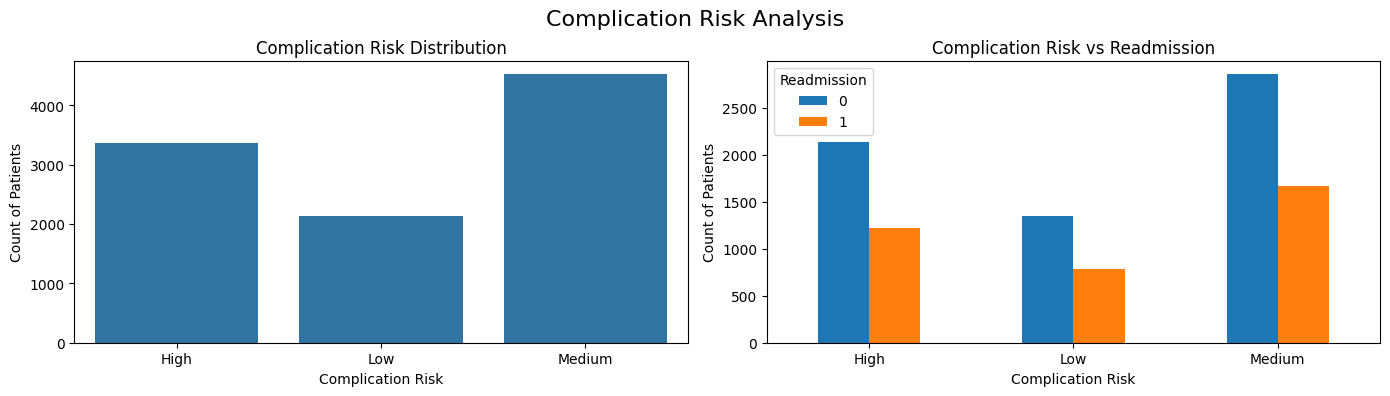

In [39]:
# Complication Risk

# Create a copy of the dataframe with mapped values for better labels
df_plot = df.copy()
df_plot['Complication_risk'] = df_plot['Complication_risk']

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Plot 1: Distribution of Complication Risk
sns.countplot(x='Complication_risk', data=df_plot, ax=axs[0])
axs[0].set_title('Complication Risk Distribution')
axs[0].set_xlabel('Complication Risk')
axs[0].set_ylabel('Count of Patients')

# Plot 2: Complication Risk vs Readmission using crosstab
cross_tab = pd.crosstab(df_plot['Complication_risk'], df_plot['ReAdmis'])
cross_tab.plot(kind='bar', ax=axs[1])
axs[1].set_title('Complication Risk vs Readmission')
axs[1].set_xlabel('Complication Risk')
axs[1].set_ylabel('Count of Patients')
axs[1].legend(title='Readmission')
axs[1].tick_params(axis='x', rotation=0)

# Add a suptitle over both subplots
fig.suptitle('Complication Risk Analysis', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()


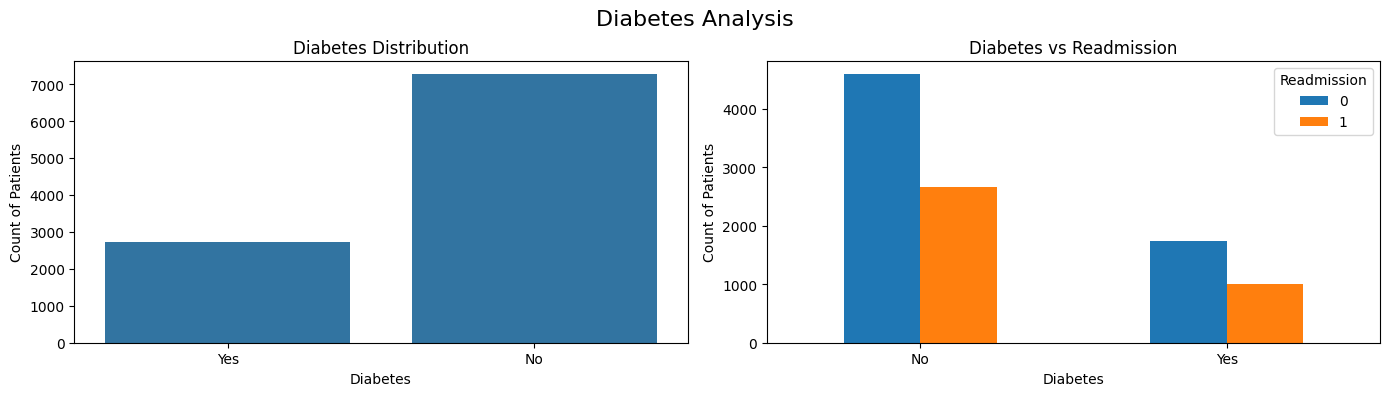

In [40]:
# Diabetes

# Create a copy of the dataframe with mapped values for better labels
df_plot = df.copy()
df_plot['Diabetes'] = df_plot['Diabetes'].map({0: 'No', 1: 'Yes'})

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Plot 1: Distribution of Diabetes
sns.countplot(x='Diabetes', data=df_plot, ax=axs[0])
axs[0].set_title('Diabetes Distribution')
axs[0].set_xlabel('Diabetes')
axs[0].set_ylabel('Count of Patients')

# Plot 2: Diabetes vs Readmission using crosstab
cross_tab = pd.crosstab(df_plot['Diabetes'], df_plot['ReAdmis'])
cross_tab.plot(kind='bar', ax=axs[1])
axs[1].set_title('Diabetes vs Readmission')
axs[1].set_xlabel('Diabetes')
axs[1].set_ylabel('Count of Patients')
axs[1].legend(title='Readmission')
axs[1].tick_params(axis='x', rotation=0)

# Add a suptitle over both subplots
fig.suptitle('Diabetes Analysis', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()

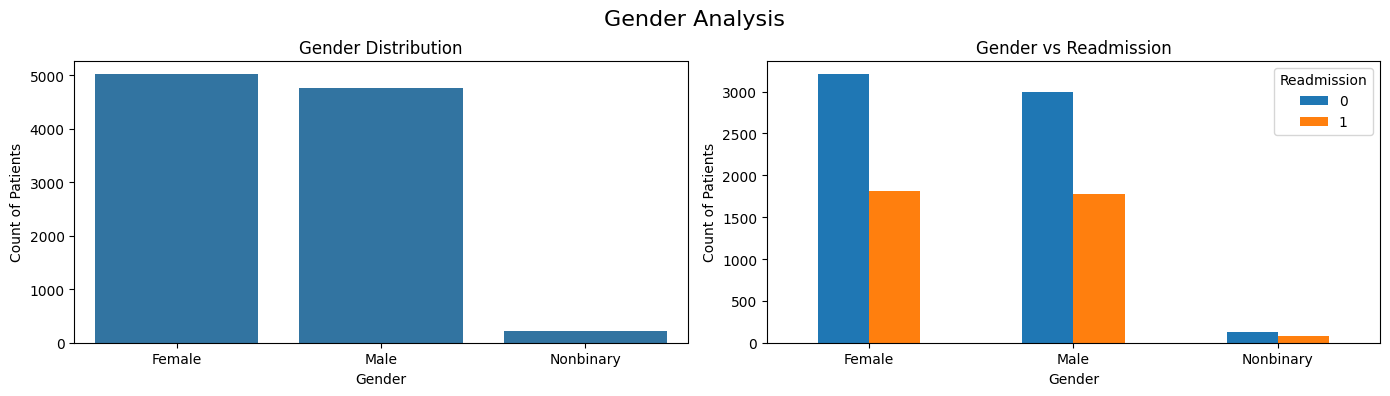

In [41]:
# Gender

# Create a copy of the dataframe with mapped values for better labels
df_plot = df.copy()
df_plot['Gender'] = df_plot['Gender']

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Plot 1: Distribution of Gender
sns.countplot(x='Gender', data=df_plot, ax=axs[0])
axs[0].set_title('Gender Distribution')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count of Patients')

# Plot 2: Gender vs Readmission using crosstab
cross_tab = pd.crosstab(df_plot['Gender'], df_plot['ReAdmis'])
cross_tab.plot(kind='bar', ax=axs[1])
axs[1].set_title('Gender vs Readmission')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Count of Patients')
axs[1].legend(title='Readmission')
axs[1].tick_params(axis='x', rotation=0)

# Add a suptitle over both subplots
fig.suptitle('Gender Analysis', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()


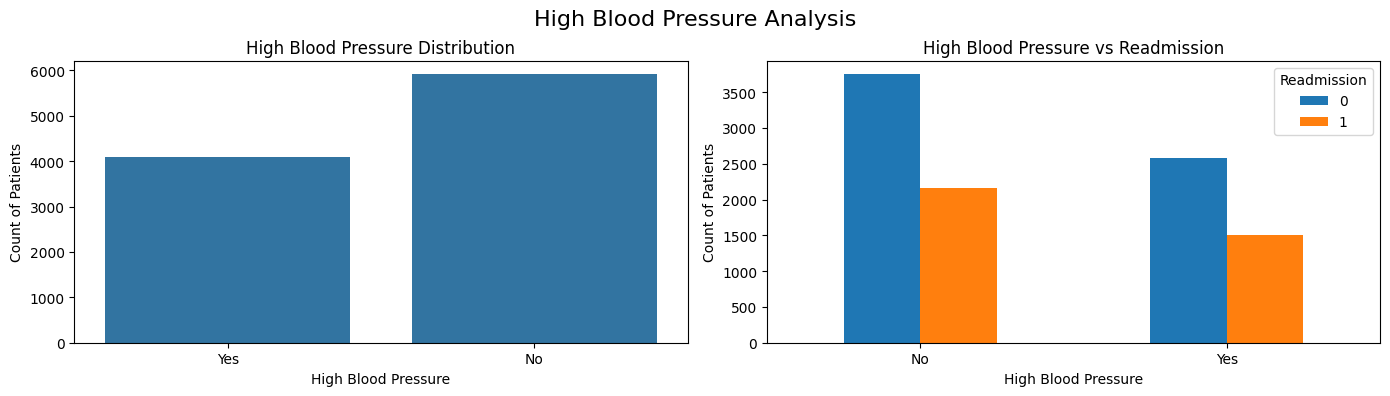

In [42]:
# High Blood Pressure

# Create a copy of the dataframe with mapped values for better labels
df_plot = df.copy()
df_plot['HighBlood'] = df_plot['HighBlood'].map({0: 'No', 1: 'Yes'})

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Plot 1: Distribution of High Blood Pressure
sns.countplot(x='HighBlood', data=df_plot, ax=axs[0])
axs[0].set_title('High Blood Pressure Distribution')
axs[0].set_xlabel('High Blood Pressure')
axs[0].set_ylabel('Count of Patients')

# Plot 2: High Blood Pressure vs Readmission using crosstab
cross_tab = pd.crosstab(df_plot['HighBlood'], df_plot['ReAdmis'])
cross_tab.plot(kind='bar', ax=axs[1])
axs[1].set_title('High Blood Pressure vs Readmission')
axs[1].set_xlabel('High Blood Pressure')
axs[1].set_ylabel('Count of Patients')
axs[1].legend(title='Readmission')
axs[1].tick_params(axis='x', rotation=0)

# Add a suptitle over both subplots
fig.suptitle('High Blood Pressure Analysis', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()


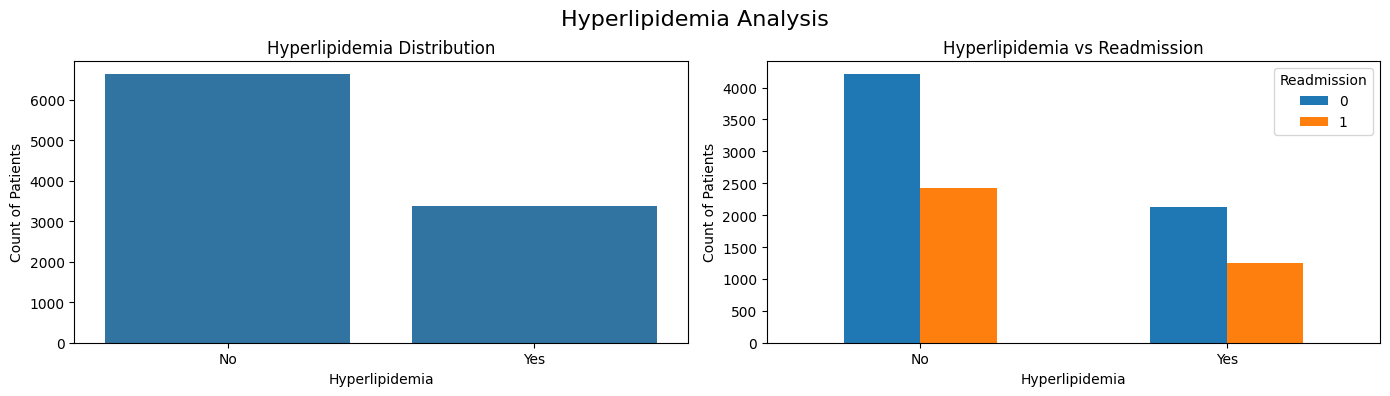

In [43]:
# Hyperlipidemia

# Create a copy of the dataframe with mapped values for better labels
df_plot = df.copy()
df_plot['Hyperlipidemia'] = df_plot['Hyperlipidemia'].map({0: 'No', 1: 'Yes'})

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Plot 1: Distribution of Hyperlipidemia
sns.countplot(x='Hyperlipidemia', data=df_plot, ax=axs[0])
axs[0].set_title('Hyperlipidemia Distribution')
axs[0].set_xlabel('Hyperlipidemia')
axs[0].set_ylabel('Count of Patients')

# Plot 2: Hyperlipidemia vs Readmission using crosstab
cross_tab = pd.crosstab(df_plot['Hyperlipidemia'], df_plot['ReAdmis'])
cross_tab.plot(kind='bar', ax=axs[1])
axs[1].set_title('Hyperlipidemia vs Readmission')
axs[1].set_xlabel('Hyperlipidemia')
axs[1].set_ylabel('Count of Patients')
axs[1].legend(title='Readmission')
axs[1].tick_params(axis='x', rotation=0)

# Add a suptitle over both subplots
fig.suptitle('Hyperlipidemia Analysis', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()


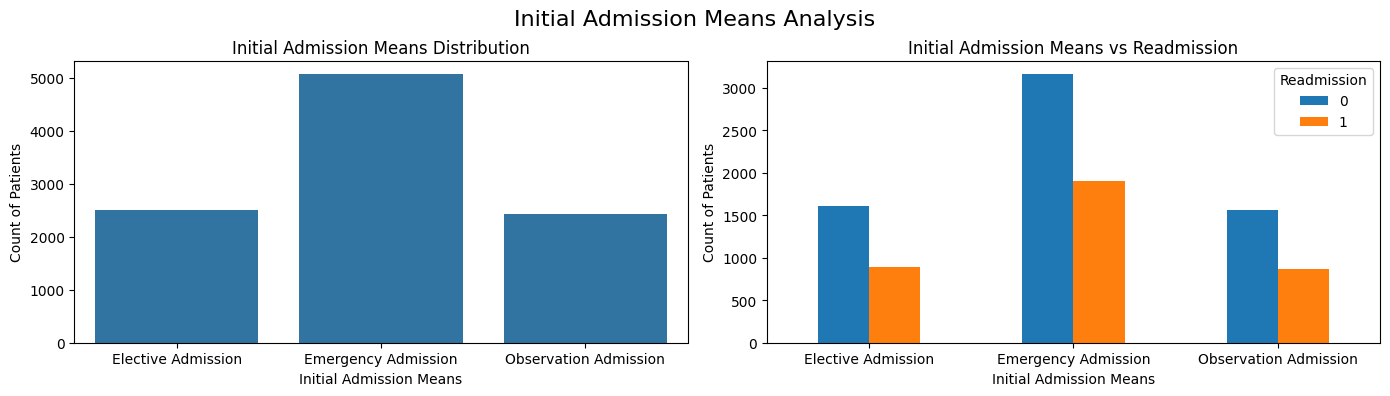

In [44]:
# Initial Admission Means

# Create a copy of the dataframe with mapped values for better labels
df_plot = df.copy()
df_plot['Initial_admin'] = df_plot['Initial_admin']

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Plot 1: Distribution of Initial Admission Means
sns.countplot(x='Initial_admin', data=df_plot, ax=axs[0])
axs[0].set_title('Initial Admission Means Distribution')
axs[0].set_xlabel('Initial Admission Means')
axs[0].set_ylabel('Count of Patients')

# Plot 2: Initial Admission Means vs Readmission using crosstab
cross_tab = pd.crosstab(df_plot['Initial_admin'], df_plot['ReAdmis'])
cross_tab.plot(kind='bar', ax=axs[1])
axs[1].set_title('Initial Admission Means vs Readmission')
axs[1].set_xlabel('Initial Admission Means')
axs[1].set_ylabel('Count of Patients')
axs[1].legend(title='Readmission')
axs[1].tick_params(axis='x', rotation=0)

# Add a suptitle over both subplots
fig.suptitle('Initial Admission Means Analysis', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()


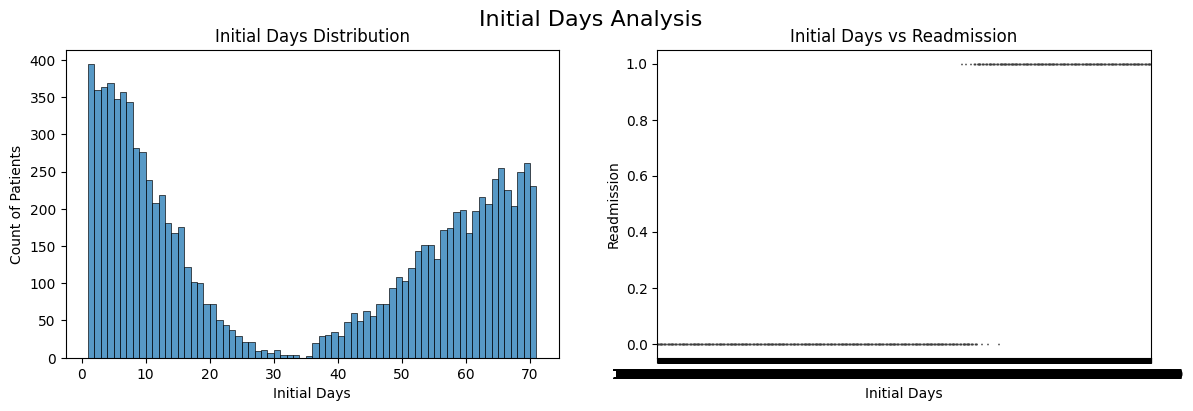

In [45]:
# Initial_days

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

## Univariate Analysis ##
min_Initial_days = df.Initial_days.min()
max_Initial_days = df.Initial_days.max()
bins = np.arange(min_Initial_days, max_Initial_days, 1)
sns.histplot(df['Initial_days'], bins=bins, ax=axs[0])

# Chart features for Initial Days distribution
axs[0].set_title('Initial Days Distribution')
axs[0].set_xlabel('Initial Days')
axs[0].set_ylabel('Count of Patients')

## Bivariate Analysis ##
sns.boxplot(data=df, x='Initial_days', y='ReAdmis', ax=axs[1])

# Chart features for Initial Days vs Readmission
axs[1].set_title('Initial Days vs Readmission')
axs[1].set_xlabel('Initial Days')
axs[1].set_ylabel('Readmission')

# Add a suptitle over both subplots
fig.suptitle('Initial Days Analysis', fontsize=16)

# Adjust layout with more padding
plt.subplots_adjust(wspace=0.2) 

# Show the plots
plt.show()


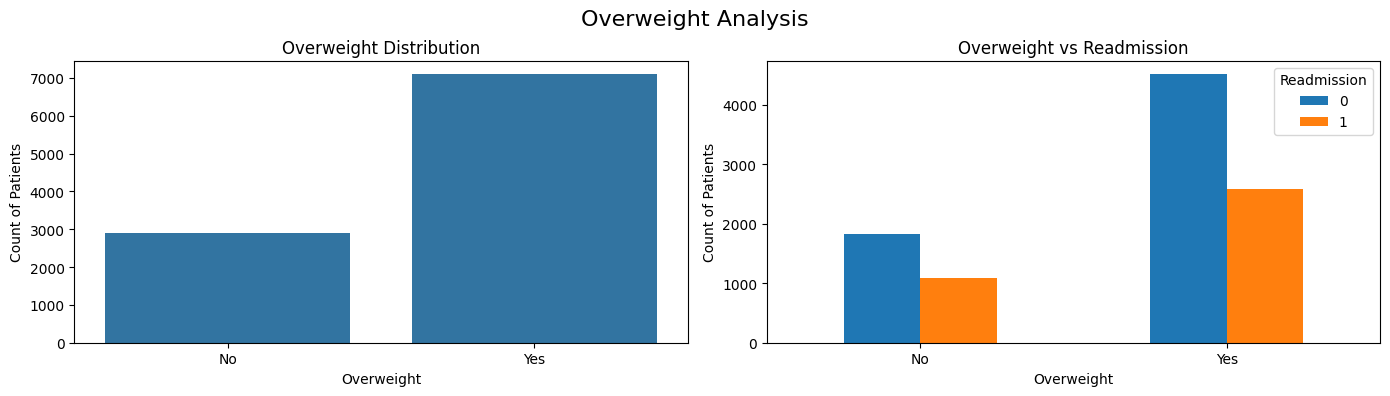

In [46]:
# Overweight

# Create a copy of the dataframe with mapped values for better labels
df_plot = df.copy()
df_plot['Overweight'] = df_plot['Overweight'].map({0: 'No', 1: 'Yes'})

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Plot 1: Distribution of Overweight
sns.countplot(x='Overweight', data=df_plot, ax=axs[0])
axs[0].set_title('Overweight Distribution')
axs[0].set_xlabel('Overweight')
axs[0].set_ylabel('Count of Patients')

# Plot 2: Overweight vs Readmission using crosstab
cross_tab = pd.crosstab(df_plot['Overweight'], df_plot['ReAdmis'])
cross_tab.plot(kind='bar', ax=axs[1])
axs[1].set_title('Overweight vs Readmission')
axs[1].set_xlabel('Overweight')
axs[1].set_ylabel('Count of Patients')
axs[1].legend(title='Readmission')
axs[1].tick_params(axis='x', rotation=0)

# Add a suptitle over both subplots
fig.suptitle('Overweight Analysis', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()


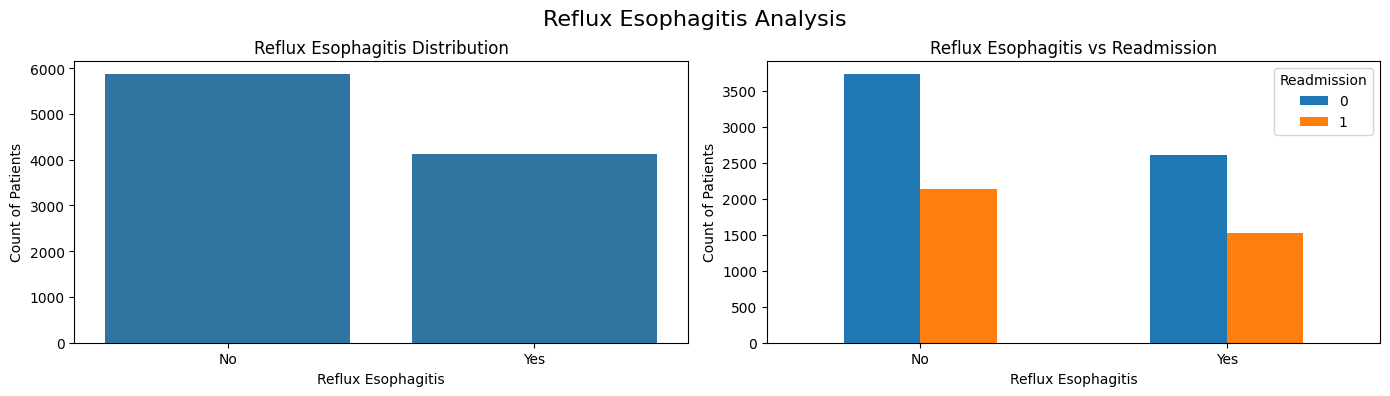

In [47]:
# Reflux Esophagitis

# Create a copy of the dataframe with mapped values for better labels
df_plot = df.copy()
df_plot['Reflux_esophagitis'] = df_plot['Reflux_esophagitis'].map({0: 'No', 1: 'Yes'})

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Plot 1: Distribution of Reflux Esophagitis
sns.countplot(x='Reflux_esophagitis', data=df_plot, ax=axs[0])
axs[0].set_title('Reflux Esophagitis Distribution')
axs[0].set_xlabel('Reflux Esophagitis')
axs[0].set_ylabel('Count of Patients')

# Plot 2: Reflux Esophagitis vs Readmission using crosstab
cross_tab = pd.crosstab(df_plot['Reflux_esophagitis'], df_plot['ReAdmis'])
cross_tab.plot(kind='bar', ax=axs[1])
axs[1].set_title('Reflux Esophagitis vs Readmission')
axs[1].set_xlabel('Reflux Esophagitis')
axs[1].set_ylabel('Count of Patients')
axs[1].legend(title='Readmission')
axs[1].tick_params(axis='x', rotation=0)

# Add a suptitle over both subplots
fig.suptitle('Reflux Esophagitis Analysis', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()


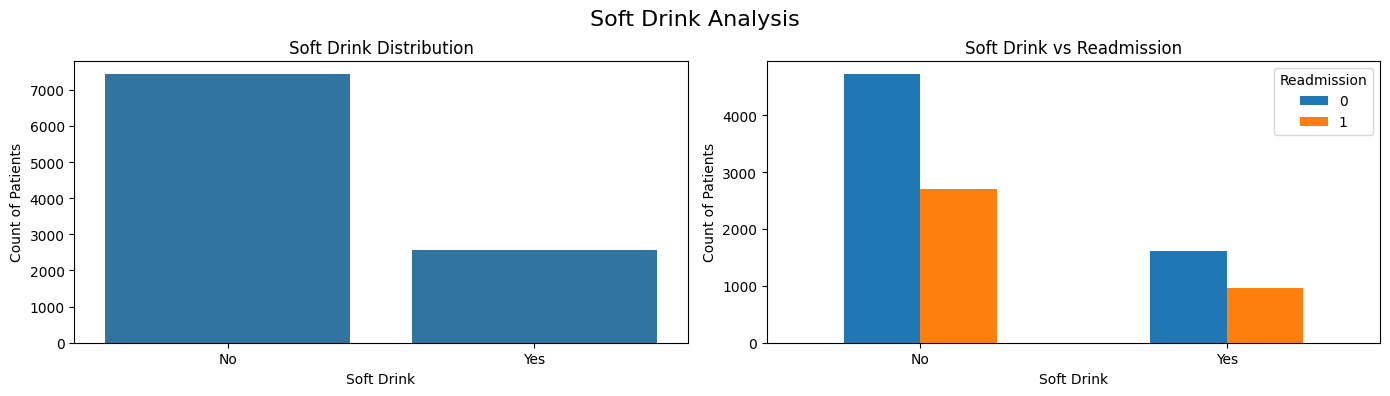

In [48]:
# Soft Drink

# Create a copy of the dataframe with mapped values for better labels
df_plot = df.copy()
df_plot['Soft_drink'] = df_plot['Soft_drink'].map({0: 'No', 1: 'Yes'})

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Plot 1: Distribution of Soft Drink
sns.countplot(x='Soft_drink', data=df_plot, ax=axs[0])
axs[0].set_title('Soft Drink Distribution')
axs[0].set_xlabel('Soft Drink')
axs[0].set_ylabel('Count of Patients')

# Plot 2: Soft Drink vs Readmission using crosstab
cross_tab = pd.crosstab(df_plot['Soft_drink'], df_plot['ReAdmis'])
cross_tab.plot(kind='bar', ax=axs[1])
axs[1].set_title('Soft Drink vs Readmission')
axs[1].set_xlabel('Soft Drink')
axs[1].set_ylabel('Count of Patients')
axs[1].legend(title='Readmission')
axs[1].tick_params(axis='x', rotation=0)

# Add a suptitle over both subplots
fig.suptitle('Soft Drink Analysis', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()


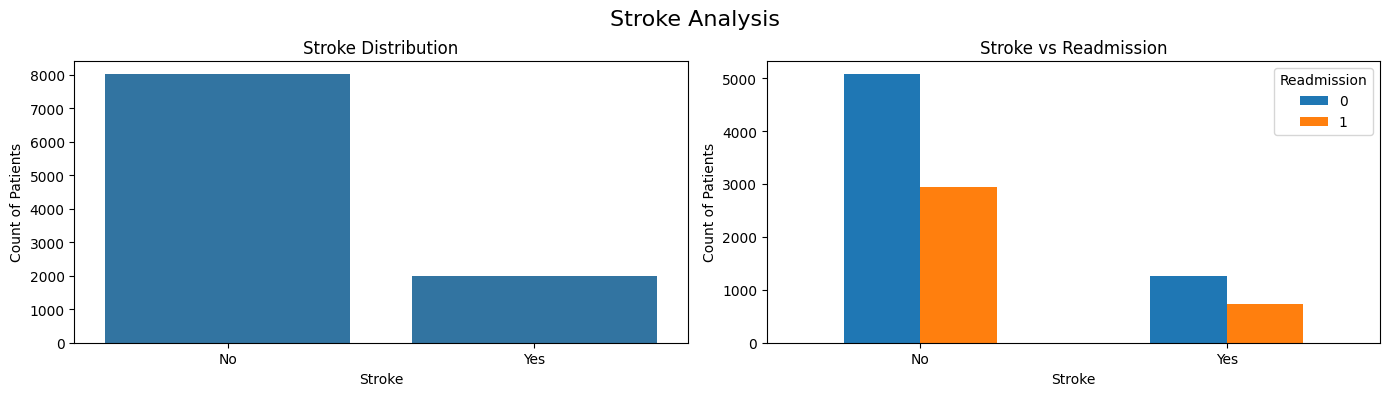

In [49]:
# Stroke

# Create a copy of the dataframe with mapped values for better labels
df_plot = df.copy()
df_plot['Stroke'] = df_plot['Stroke'].map({0: 'No', 1: 'Yes'})

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Plot 1: Distribution of Stroke
sns.countplot(x='Stroke', data=df_plot, ax=axs[0])
axs[0].set_title('Stroke Distribution')
axs[0].set_xlabel('Stroke')
axs[0].set_ylabel('Count of Patients')

# Plot 2: Stroke vs Readmission using crosstab
cross_tab = pd.crosstab(df_plot['Stroke'], df_plot['ReAdmis'])
cross_tab.plot(kind='bar', ax=axs[1])
axs[1].set_title('Stroke vs Readmission')
axs[1].set_xlabel('Stroke')
axs[1].set_ylabel('Count of Patients')
axs[1].legend(title='Readmission')
axs[1].tick_params(axis='x', rotation=0)

# Add a suptitle over both subplots
fig.suptitle('Stroke Analysis', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()


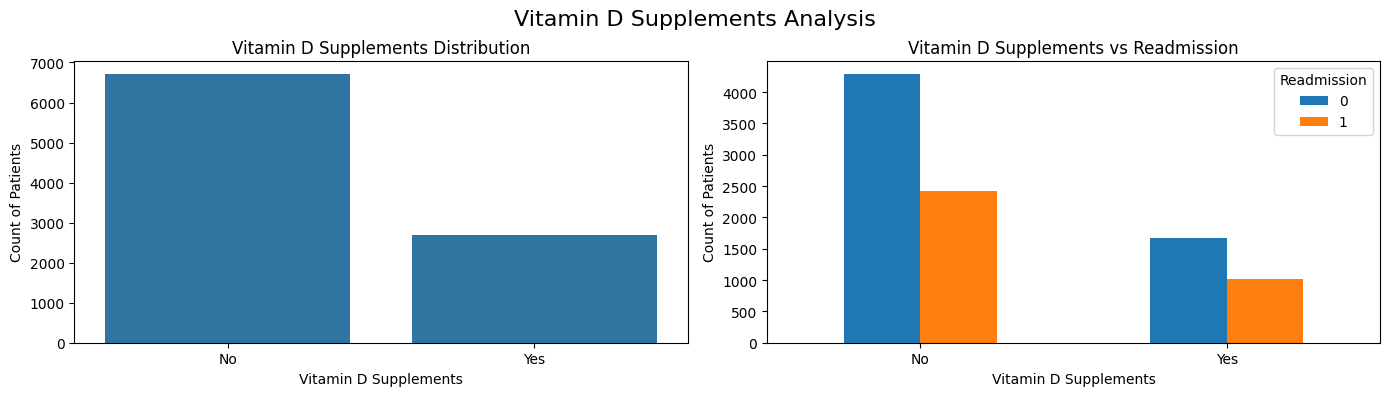

In [50]:
# Vitamin D Supplements

# Create a copy of the dataframe with mapped values for better labels
df_plot = df.copy()
df_plot['vitD_supp'] = df_plot['vitD_supp'].map({0: 'No', 1: 'Yes'})

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Plot 1: Distribution of Vitamin D Supplements
sns.countplot(x='vitD_supp', data=df_plot, ax=axs[0])
axs[0].set_title('Vitamin D Supplements Distribution')
axs[0].set_xlabel('Vitamin D Supplements')
axs[0].set_ylabel('Count of Patients')

# Plot 2: Vitamin D Supplements vs Readmission using crosstab
cross_tab = pd.crosstab(df_plot['vitD_supp'], df_plot['ReAdmis'])
cross_tab.plot(kind='bar', ax=axs[1])
axs[1].set_title('Vitamin D Supplements vs Readmission')
axs[1].set_xlabel('Vitamin D Supplements')
axs[1].set_ylabel('Count of Patients')
axs[1].legend(title='Readmission')
axs[1].tick_params(axis='x', rotation=0)

# Add a suptitle over both subplots
fig.suptitle('Vitamin D Supplements Analysis', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()


#### Feature Selection

Code referenced: Dr. Festus Elleh, D209 T1 Building KNN in Python Med; DataCamp courses

In [51]:
# Data preparation for feature selection
X = rdf.drop(['ReAdmis'], axis=1)
y = rdf['ReAdmis']
print("X shape:", X.shape)
print("y shape:", y.shape)

feature_names = X.columns

# Apply F-test
skbest = SelectKBest(score_func=f_classif, k='all')
X_new = skbest.fit_transform(X, y)
print("X_new shape:", X_new.shape)

# Calculate p-values for each feature
p_values = pd.DataFrame({
    'Feature': X.columns,
    'p_value': skbest.pvalues_
}).sort_values('p_value')

# Filter features by significance level
significant_features = p_values[p_values['p_value'] < 0.05]
features_to_keep = significant_features['Feature'].tolist()
# Create filtered dataset
X_filtered = X[features_to_keep]

print(X_filtered)
# Print the results
print("\nSignificant features (p < 0.05):")
print(features_to_keep)

# Create new dataframe with only significant features plus target
reduced_rdf = rdf[features_to_keep + ['ReAdmis']]

print("Original shape:", rdf.shape)
print("Reduced shape:", reduced_rdf.shape)

X shape: (10000, 24)
y shape: (10000,)
X_new shape: (10000, 24)
           Initial_days  Initial_Admin_Emergency Admission
CaseOrder                                                 
1             10.585770                                  1
2             15.129562                                  1
3              4.772177                                  0
4              1.714879                                  0
5              1.254807                                  0
...                 ...                                ...
9996          51.561220                                  1
9997          68.668240                                  0
9998          70.154180                                  0
9999          63.356900                                  1
10000         70.850590                                  0

[10000 rows x 2 columns]

Significant features (p < 0.05):
['Initial_days', 'Initial_Admin_Emergency Admission']
Original shape: (10000, 25)
Reduced shape: (10000, 3)


### C4. Cleaned Data Set

In [52]:
# Write DataFrame to CSV
reduced_rdf.to_csv('d209_prepared_data_task_2.csv', index=False)

## Part IV: Analysis

### D1. Splitting the Data
Code referenced: Dr. Festus Elleh, D209 T1 Building KNN in Python Med; DataCamp courses

In [53]:
# Separate features and target
X = reduced_rdf.drop(['ReAdmis'], axis=1)
y = reduced_rdf['ReAdmis']

# Set seed for reproducibility
SEED = 1

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=0.8,
    test_size=0.2,
    random_state=SEED, 
    stratify=y
)

# Recombine features and target for each split into complete datasets
mod_train = pd.concat([X_train, y_train], axis=1)
mod_test = pd.concat([X_test, y_test], axis=1)

# Verify split sizes
print("Training set shape:", mod_train.shape)
print("Test set shape:", mod_test.shape)

# Verify class distribution
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

# Verify proportion
print("\nProportion of readmissions:")
print("Training set:", len(mod_train[mod_train['ReAdmis'] == 1])/len(mod_train))
print("Test set:", len(mod_test[mod_test['ReAdmis'] == 1])/len(mod_test))

# Write training and test datasets to csv for task submission
X_test.to_csv('x_test_file_t2.csv', index=False)
y_test.to_csv('y_test_file_t2.csv', index=False)
X_train.to_csv('x_train_file_t2.csv', index=False)
y_train.to_csv('y_train_file_t2.csv', index=False)

Training set shape: (8000, 3)
Test set shape: (2000, 3)

Class distribution in training set:
ReAdmis
0    0.633125
1    0.366875
Name: proportion, dtype: float64

Class distribution in test set:
ReAdmis
0    0.633
1    0.367
Name: proportion, dtype: float64

Proportion of readmissions:
Training set: 0.366875
Test set: 0.367


### D2. Output and Intermediate Calculations

#### Methodology Overview
This analysis employs the Random Forest algorithm, a supervised machine learning ensemble technique. As described in Section B1, the method builds multiple decision trees using random subsets of data and features, with each tree "voting" on the final classification.

#### Feature Selection
Feature selection, discussed in Section C3, reduces the number of predictor variables to those with the strongest predictive power. This minimizes issues such as multicollinearity and overfitting, which can arise when using more than five predictors (Dr. Festus Elleh). Using Python’s SelectKBest and f_classif from the sklearn.feature_selection library, variables with a p-value less than 0.05 were identified as statistically significant. After this process, the dataset was refined to include only the dependent variable and the significant predictors.

#### Data Splitting
The data was split into training and testing sets using sklearn. Following standard practice, the dataset was divided into 80% training data and 20% testing data, with stratification ensuring representative sampling of readmission cases. The resulting split contained 8,000 observations in the training set and 2,000 in the test set. Consistent proportions of readmission cases (36.7%) were confirmed in both sets.

#### Hyperparameter Tuning
The best combination of hyperparameters for the Random Forest model was determmined using the GridSearchCV class for hyperparameter tuning. Grid search was performed across multiple parameters, including the number of trees, maximum tree depth, minimum samples required to split a node , and minimum samples required at leaf nodes. Bootstrap sampling was enabled and a random state was set for reproducibility. The search utilized 10-fold cross-validation to ensure robust performance estimates and prevent overfitting. ROC AUC was chosen as the scoring metric due to its effectiveness in evaluating classifier performance. The optimal model configuration used 125 trees with no maximum depth limit and required 20 samples for both node splitting and leaf nodes.

#### Hyperparameter Tuning for AdaBoost
An AdaBoost ensemble model was created using the optimized Random Forest classifier as its estimator. A grid search was performed to optimize the number of estimators and the learning rate. The SAMME algorithm was selected for the boosting process as Scikit-learn indicates that the default SAMME-R algorithm is being deprecated. ROC AUC was used as the scoring metric. The optimal configuration used 25 estimators with a learning rate of 0.5. AdaBoost may have not been necessary given the excellent performance of the original Random Forest model. However, I chose to implement it anyway for the learning experience.

#### Final Model
The final AdaBoost model was created using the optimized Random Forest classifier as its estimator and the optimal parameters for AdaBoost. The model was trained on the full training dataset and its performance was evaluated on the held-out test set. A confusion matrix was generated to provide a detailed view of the model's classification performance. 

#### Model Performance
Evaluation employed an ROC curve and AUC score. The ROC curve, which compares the true positive rate against the false positive rate, approached the top-left corner, indicating near-perfect performance. The AUC score of 0.997 confirmed the model’s excellent predictive ability, signifying almost 100% accuracy. The model achieved an accuracy of 0.972 on the test set and 0.992 on the training set. The error metrics show very low prediction error, with a Mean Squared Error (MSE) of 0.029 and a Root Mean Squared Error (RMSE) of 0.169. These low values indicate high prediction accuracy across both classes.

#### NOTE: The intermediate calculations described here are available in Section D3 as part of the code execution, with the exception of the Feature Selection process, which is demonstrated at the end of section C3. This approach is employed to ensure that the code and process elements are not unnecessarily duplicated.

### D3. Code Execution

#### Hyperparameter tuning

Code referenced: Dr. Festus Elleh, D209 Data Mining 1 Task 2 Cohort; DataCamp courses

In [54]:
# Instantiate Random Forest Classifier
rf = RandomForestClassifier()

# Define parameters for hyperparameter tuning
param_grid = { 
    'n_estimators': [75, 100, 125],
    'max_depth': [None, 15, 30],
    'max_features': ['sqrt'],
    'min_samples_split': [20, 30, 40],
    'min_samples_leaf': [5, 10, 20],
    'bootstrap': [True],
    'random_state': [42]
}

# Set up grid search with 10-fold cross validation and roc_auc as the scoring metric
grid = GridSearchCV(
    rf, 
    param_grid, 
    cv=10, 
    scoring='roc_auc', 
    return_train_score=False,
    n_jobs=-1,
    verbose=1
)

# Perform the actual grid search
grid.fit(X_train, y_train)

# Print best parameters and score
print("\nBest parameters:", grid.best_params_)
print("Best ROC AUC score:", grid.best_score_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 20, 'n_estimators': 125, 'random_state': 42}
Best ROC AUC score: 0.9980545422685972


In [55]:
# Get the best model from grid search
best_rf = grid.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Model accuracy
print(f"The accuracy of the test model is {best_rf.score(X_test, y_test):.3f}")
print(f"The accuracy of the training model is {best_rf.score(X_train, y_train):.3f}\n")

# ROC AUC Score
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.3f}\n")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.3f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.3f}\n")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

The accuracy of the test model is 0.978
The accuracy of the training model is 0.982

ROC AUC Score: 0.998

Mean Squared Error: 0.022
Root Mean Squared Error: 0.150


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1266
           1       0.97      0.97      0.97       734

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



#### Hyperparameter tuning for AdaBoost

Code referenced: Dr. Festus Elleh, D209 Data Mining 1 Task 2 Cohort; DataCamp courses

In [56]:
# Best RandomForestClassifier
best_rf = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=20,
    min_samples_split=20,
    n_estimators=125,
    random_state=42
)

# Create AdaBoost parameter grid
ada_params = {
    'n_estimators': [25, 50, 75],  
    'learning_rate': [0.1, 0.5, 1.0],
}

# Create initial AdaBoost with the best RandomForest as base estimator
initial_ada = AdaBoostClassifier(
    estimator=best_rf,
    algorithm='SAMME',
    random_state=42
)

# Set up grid search
ada_grid = GridSearchCV(
    estimator=initial_ada,
    param_grid=ada_params,
    cv=5,
    scoring='roc_auc',
    verbose=1,
)

# Fit the model
ada_grid.fit(X_train, y_train)

# Print best parameters and score
print("\nBest parameters:", ada_grid.best_params_)
print("Best ROC AUC score:", round(ada_grid.best_score_, 4))

Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best parameters: {'learning_rate': 0.5, 'n_estimators': 25}
Best ROC AUC score: 0.9971


#### Final Model

Code referenced: Dr. Festus Elleh, D209 Data Mining 1 Task 2 Cohort; DataCamp courses

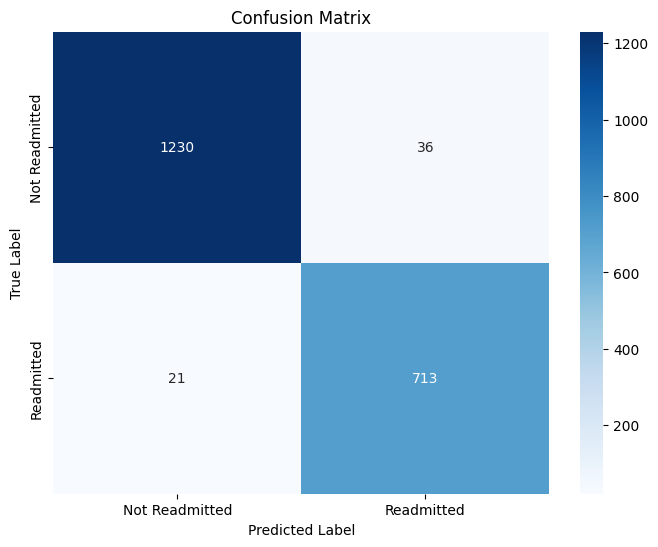

In [57]:
# Best RandomForestClassifier
final_rf = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=20,
    min_samples_split=20,
    n_estimators=125,
    random_state=42
)

# Best AdaBoostClassifier
final_ada = AdaBoostClassifier(
    estimator=final_rf,
    algorithm='SAMME',
    n_estimators=25,
    learning_rate=0.5,
    random_state=42
)

# Fit ada to the training set
final_ada.fit(X_train, y_train)

# Predict test set labels
final_y_pred = final_ada.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, final_y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

#### AUC / ROC of model

Code referenced: Dr. Festus Elleh, D209 Data Mining 1 Task 2 Cohort; DataCamp courses

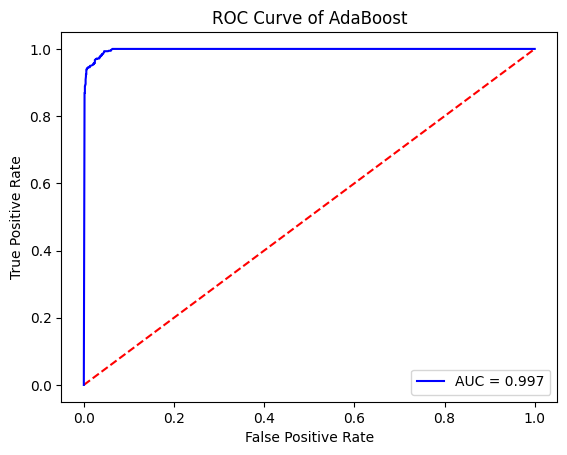

The AUC for the model is: 0.9971423006228719


In [58]:
# ROC curve
y_predProb = final_ada.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_predProb)

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'r--')

# Plot ROC curve with label including AUC
auc = roc_auc_score(y_test, y_predProb)
plt.plot(fpr, tpr, 'b-', label=f'AUC = {auc:.3f}')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of AdaBoost')

# Add legend
plt.legend(loc='lower right')
plt.show()

print('The AUC for the model is:', auc)

## Part V: Data Summary and Implications

### E1. Accuracy and MSE
Code referenced: Dr. Festus Elleh, D209 Data Mining 1 Task 2 Cohort; DataCamp courses

#### Accuracy
Accuracy measures the proportion of correctly predicted observations out of the total observations. This is calculated as (True Positives = True Negatives) / Total Observations. This model demonstrates excellent overall classification performance with an accuracy score of 97.2% (1,962/2,000). The confusion matrix reveals that 1,943 out of 2,000 test observations were correctly predicted, leaving only 57 misclassifications. The model achieves a precision of 97% (correct positive predictions) and recall of 97% (correct identification of actual positives) showing strong performance across key classification metrics.

#### MSE
The Mean Squared Error (MSE) represents the model's accuracy in making predictions, with this model achieving a low score of 0.029. This means that when we square the differences between predicted and actual values, the average deviation is just 0.029 units from perfect predictions. MSE is measured on a scale of 0 (perfect predictions) to 1.0 (worst-case scenario in binary classification). This model's MSE indicates that our it makes highly accurate predictions with minimal errors. 

In [59]:
# Model accuracy
print(f"The accuracy of the test model is {final_ada.score(X_test, y_test):.3f}")
print(f"The accuracy of the training model is {final_ada.score(X_train, y_train):.3f}\n")
print(f"ROC AUC Score: {roc_auc_score(y_test, final_ada.predict_proba(X_test)[:,1]):.3f}\n")

# Calculate MSE
mse = mean_squared_error(y_test, final_y_pred)
print(f"Mean Squared Error: {mse:.3f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, final_y_pred))
print(f"Root Mean Squared Error: {rmse:.3f}\n")
      
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, final_y_pred))

The accuracy of the test model is 0.972
The accuracy of the training model is 0.992

ROC AUC Score: 0.997

Mean Squared Error: 0.029
Root Mean Squared Error: 0.169


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1266
           1       0.95      0.97      0.96       734

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



### E2. Results and Implications

The initial research question for this analysis was: "Can key demographic and medical factors predict whether a patient will be readmitted to the hospital?" Based on the evaluation metrics used to evaluate this Random Forest Classification model with Ada Boost, I do believe that hospital readmission can indeed be predicted with this dataset. The model's accuracy score of 97.2% is a strong indicator of its predictive power. This finding aligns with results from the logistic regression model I completed in D208 and the K-Nearest Neighbors (KNN) model I completed in Task 1 of this course. Interestingly, both of the previous models achieved slightly higher accuracy scores with the logistic regression model achieving a  score of 98.5% and the KNN model achieving an accuracy score of 98.1%.

Beyond accuracy, the model in this analysis had excellent performance across other metrics. It achieved a precision of 97% (correct identification of positive predictions), a recall of 97% (correct identification of actual positives), and an exceptional AUC score of 0.997, underscoring the model's excellent ability to distinguish between classes. These high evaluation scores affirm the model's ability to predict hospital readmission effectively.

Despite the positive results, I do believe there are areas for improvement. The dataset used for this analysis shows that only 36.7% of patients were readmitted, which introduces a large degree of class imbalance. Expanding the dataset with more observations would help with robust training and ensure the model can be generally applied. Additionally, the dataset's fifty variables are quite limiting given the amount of data in the medical realm and considering the multifaceted factors that influence hospital readmissions. Further analysis could benefit from a more extensive and diverse dataset.

### E3. Limitation

A key limitation of this data analysis is the class imbalance within the dataset. As I briefly discussed in Section E2, the dataset used for this analysis shows that only 36.7% of patients were readmitted, which is a significant degree of class imbalance. This imbalance can lead to model performance issues, as the random forest algorithm may become biased toward the not readmitted class, particularly when constructing individual decision trees based on bootstrapped samples. While random forests are generally more robust to class imbalance than some other algorithms, this skewed distribution can still result in reduced predictive accuracy for the readmitted class. These misclassifications can hurt the model's effectiveness in accurately identifying patients at risk of readmission. Addressing class imbalance is crucial to enhance model performance and ensure reliable predictions (Olamendy, 2024).

### E4. Course of Action

I do believe that a company could use this Random Forest model with Adaptive Boosting to predict hospital readmissions. Its high accuracy score of 97.2% confirms its ability to predict readmissions. Furthermore, metrics such as precision, recall, AUC, and MSE have excellent scores. That being said, I am concerned about the practical application and what a company could actually do with this information. The predictor variables of initial days spent in the hospital and that the initial admission reason was an emergency doesn't give us a lot of information as to what we could do differently to reduce readmissions. In a real-world scenario, more specific strategies would be ideal, such as identifying actions that could reduce readmissions during a patient's initial stay or after emergency admission. Further analysis, including additional data points, would be necessary to uncover the factors contributing to length of stay and emergency admissions.

I do have some concern about overfitting of the model given that there is a higher degree of seperation between the test accuracy score and the training accuracy score after implementing adaptive boosting. The model may be better off without the adpative boosting given the already high accuracy scores of the random forest classifier. If I were to iterate on this analysis in a real-world situation, I would probably go back to the hyperparameter tuning for the random forest and add more options. The amount of time it takes for hyperparameter tuning to complete is unrealistic for this analysis, where in the real-world I imagine the amount of time it takes grid search to complete would not factor in as much.

A key gap in many organizations is the communication between data teams and front-line staff. I suggest partnering with front-line staff to refine initial models. Presenting my findings to them could spark new insights. There are likely additional variables in the healthcare setting that could enhance the model, and front-line staff, who are directly involved in patient care and data entry, would be valuable partners in identifying these variables.

## Part VI: Demonstration

### F. Panopto Recording

Attached to submission. Includes:
- a demonstration of the functionality of the code used for the analysis
- a summary of the programming environment

### G. Sources for Third-Party Code

Elleh, F. (n.d.). D209 Data Mining 1 Task 2 Cohort. https://westerngovernorsuniversity.sharepoint.com/:p:/r/sites/DataScienceTeam/_layouts/15/Doc.aspx?sourcedoc=%7B3BDA644B-A08B-48B3-9F30-80D67738E48E%7D&file=D209%20Data%20Mining%201%20Task%202%20Cohort.pptx&action=edit&mobileredirect=true 

Elleh, F. (n.d.). D209 T1 Building KNN in Python Med. Western Governors University. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=33a63ab2-3d64-48b2-af4a-b11b0124c03f

Python Pandas - get_dummies() method. (2020, July 28). GeeksforGeeks. https://www.geeksforgeeks.org/python-pandas-get_dummies-method/

stikpet. (2022, July 13). Python - Creating Bins (bucketing). YouTube. https://www.youtube.com/watch?v=I83PNH0JRMA

### H. Sources

Elleh, F. (n.d.). D209 Data Mining 1 Task 2 Cohort. https://westerngovernorsuniversity.sharepoint.com/:p:/r/sites/DataScienceTeam/_layouts/15/Doc.aspx?sourcedoc=%7B3BDA644B-A08B-48B3-9F30-80D67738E48E%7D&file=D209%20Data%20Mining%201%20Task%202%20Cohort.pptx&action=edit&mobileredirect=true 

Feature importance in random forest: In-depth guide. ML Journey. (2024, July 2). https://mljourney.com/feature-importance-in-random-forest-in-depth-guide/ 

M, S. (2024, July 23). Introduction to random forest in R. Simplilearn.com. https://www.simplilearn.com/tutorials/data-science-tutorial/random-forest-in-r#:~:text=Assumptions%20for%20the%20Random%20Forest%20Algorithm%20*,accurate%20results%2C%20rather%20than%20provide%20an%20estimation.&text=*%20The%20predictions%20from%20each%20tree%20must%20have%20very%20low%20correlations. 

Olamendy, J. C. (2024, June 4). Practical ML: Addressing class imbalance. Medium. https://medium.com/@juanc.olamendy/practical-ml-addressing-class-imbalance-25c4f1b97ee3 

WGU. (n.d.). Data files and associated dictionary files.
https://access.wgu.edu/ASP3/aap/content/g9rke9s0rlc9ejd92md0.html

What is Random Forest?. IBM. (n.d.-c). https://www.ibm.com/topics/random-forest 